# Exploration, Preprocessing and Bag of Words (BoW)
Exploration and Preprocessing are a central part in any Natural Language Processing task. In order to extract relevant information from data, it is extremely important to understand the data in detail and how to process it. 

Exploratory analysis of text data incorporates principles similar to those in other machine learning tasks, including identifying and managing duplicate values, addressing missing data, and exploring data distributions. Additionally, it involves text-specific tasks such as language detection and examining statistical features related to word count.

The preprocessing can be divided into two broad categories - **Noise Removal** and **Normalization**:


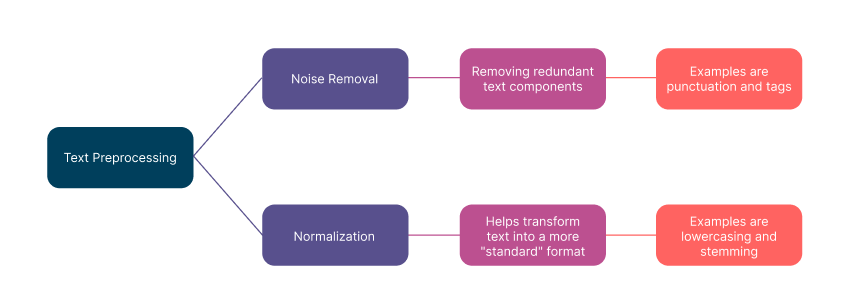

In this notebook, we will use the dataset "Amazon Fine Food Reviews" from Kaggle (https://www.kaggle.com/snap/amazon-fine-food-reviews). "This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories."

Consider looking at the kaggle code examples for this dataset for further inspiration on how to perform these types of tasks!

We have already made the train/test split for you with 75000 examples for training and 5000 for testing. The train and test corpus labels are scores from 1-5 with 1 meaning the review is bad/negative and 5 meaning the review is good/positive, thereby the goal is to create a very simple classifier that predicts a review score.

Our feature space will be the vocabulary, where each word corresponds to a feature, as per the Bag of Words model.

The major goal for this notebook is for you to understand well all the exploration and preprocessing steps required for working with text and know how to apply BoW with a simple classifier! 

# Data import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install seaborn

In [4]:
amazon_df_train = pd.read_csv('dataset_amazon_train.csv')
amazon_df_test = pd.read_csv('dataset_amazon_test.csv')
#amazon_df_train = pd.read_csv('/Users/.../Desktop/dataset_amazon_train.csv')
#amazon_df_test = pd.read_csv('/Users/.../Desktop/dataset_amazon_test.csv')

In [5]:
amazon_df_train.head(5)

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
amazon_df_train = pd.DataFrame(data=amazon_df_train, columns=['Score', 'Text'])
amazon_df_test = pd.DataFrame(data=amazon_df_test, columns=['Score', 'Text'])

In [7]:
amazon_df_train[40:43]

,Score,Text
40,5,The variety packs taste great!<br /><br />I ha...
41,5,McCann's makes oatmeal for every oatmeal conno...
42,5,I have McCann's Oatmeal every morning and by o...


# Exploratory analysis

## Score (dependent feature)

In [8]:
amazon_df_train['Score'].describe()

count    75000.000000
mean         4.149840
std          1.323157
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Score, dtype: float64

In [9]:
# No missing values
(amazon_df_train['Score']).unique()

array([5, 1, 4, 2, 3], dtype=int64)

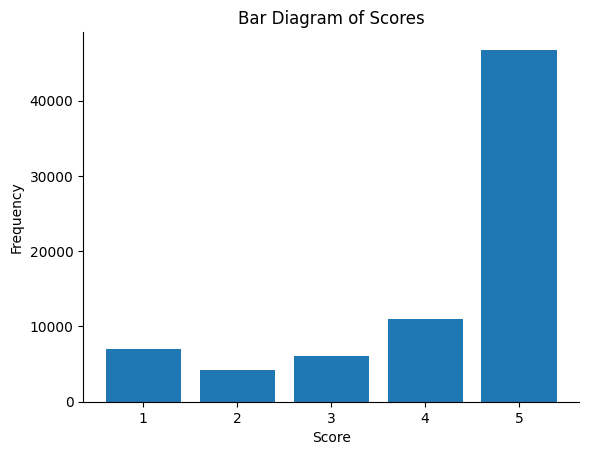

In [10]:
plt.bar(amazon_df_train['Score'].value_counts().index,amazon_df_train['Score'].value_counts().values)
plt.grid(False)  
plt.title('Bar Diagram of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

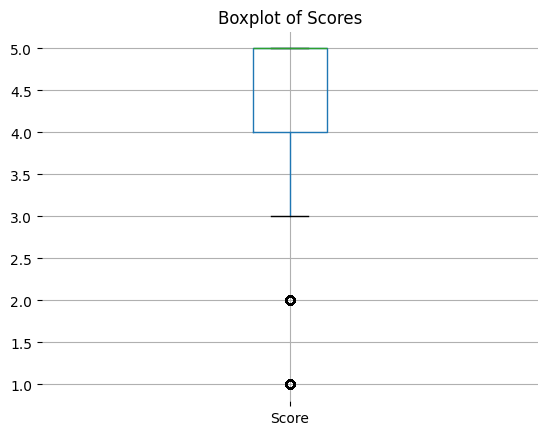

In [11]:
amazon_df_train.boxplot(column=['Score'])
plt.title('Boxplot of Scores')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.show()

## Text (independent feature)

In [12]:
amazon_df_train['Text'][10]

"I don't know if it's the cactus or the tequila or just the unique combination of ingredients, but the flavour of this hot sauce makes it one of a kind!  We picked up a bottle once on a trip we were on and brought it back home with us and were totally blown away!  When we realized that we simply couldn't find it anywhere in our city we were bummed.<br /><br />Now, because of the magic of the internet, we have a case of the sauce and are ecstatic because of it.<br /><br />If you love hot sauce..I mean really love hot sauce, but don't want a sauce that tastelessly burns your throat, grab a bottle of Tequila Picante Gourmet de Inclan.  Just realize that once you taste it, you will never want to use any other sauce.<br /><br />Thank you for the personal, incredible service!"

In [13]:
amazon_df_train['Text'].isna().sum() 

0

### Word count
Let's start by splitting our texts into tokens and count how many tokens exist in each document.

In [14]:
# Fetch wordcount for each abstract
amazon_df_train['word_count']  = amazon_df_train['Text'].apply(lambda x: len(str(x).split(" ")))
amazon_df_train[['Text','word_count']].head()

,Text,word_count
0,I have bought several of the Vitality canned d...,49
1,Product arrived labeled as Jumbo Salted Peanut...,31
2,This is a confection that has been around a fe...,99
3,If you are looking for the secret ingredient i...,43
4,Great taffy at a great price. There was a wid...,30


### Descriptive statistics of word count

In [15]:
amazon_df_train.word_count.describe()

count    75000.000000
mean        82.350347
std         78.830345
min          6.000000
25%         35.000000
50%         59.000000
75%        101.000000
max       2640.000000
Name: word_count, dtype: float64

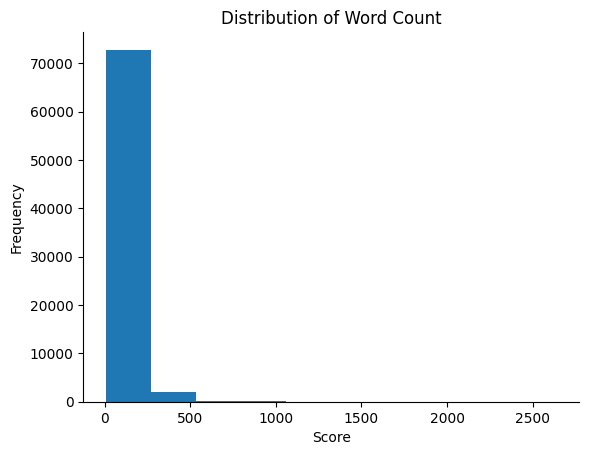

In [16]:
amazon_df_train['word_count'].hist()
plt.grid(False)  
plt.title('Distribution of Word Count')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [17]:
all_words = ' '.join(amazon_df_train['Text']).split()

In [18]:
freq = pd.Series(all_words).value_counts()

In [19]:
freq.sort_values(ascending=False)[0:10]

the    215577
I      182272
and    162716
a      154151
to     131242
of     105146
is      94610
it      82415
for     68639
in      67188
Name: count, dtype: int64

In [20]:
freq.index[0:10]

Index(['the', 'I', 'and', 'a', 'to', 'of', 'is', 'it', 'for', 'in'], dtype='object')

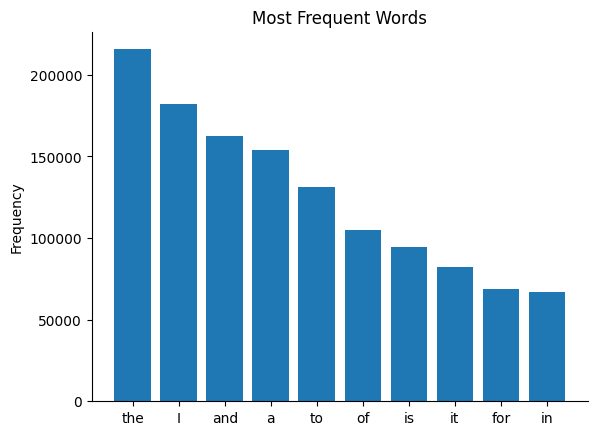

In [21]:
x_labels = freq.index[0:10]
values = freq[:10]
plt.bar(x_labels, values)
plt.xticks(x_labels)
plt.ylabel('Frequency')
plt.title('Most Frequent Words')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

### Word cloud

In [22]:
#!pip install wordcloud

In [23]:
from wordcloud import WordCloud 

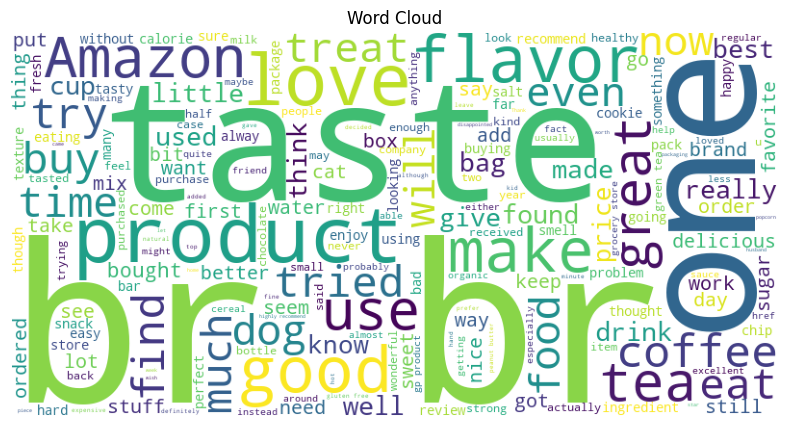

In [24]:
# Joining all the reviews into a single string
all_reviews = ' '.join(amazon_df_train['Text'])
    
# Create WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_reviews)

#Plotting the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Word Cloud')
plt.show()

In [25]:
# Should this be used as a preprocessing step?
for i in range(amazon_df_train.shape[0]):
    if '<br' in amazon_df_train['Text'].iloc[i]:
        print(amazon_df_train['Text'].iloc[i])
        break        

I don't know if it's the cactus or the tequila or just the unique combination of ingredients, but the flavour of this hot sauce makes it one of a kind!  We picked up a bottle once on a trip we were on and brought it back home with us and were totally blown away!  When we realized that we simply couldn't find it anywhere in our city we were bummed.<br /><br />Now, because of the magic of the internet, we have a case of the sauce and are ecstatic because of it.<br /><br />If you love hot sauce..I mean really love hot sauce, but don't want a sauce that tastelessly burns your throat, grab a bottle of Tequila Picante Gourmet de Inclan.  Just realize that once you taste it, you will never want to use any other sauce.<br /><br />Thank you for the personal, incredible service!


# Quick stop to understand preprocessing

## Tokenization

In [26]:
text = 'The cat on the table?'

In [27]:
text.split()

['The', 'cat', 'on', 'the', 'table?']

In [28]:
#!pip install nltk

In [29]:
import nltk
from nltk.tokenize import word_tokenize

In [30]:
word_tokenize(text)

['The', 'cat', 'on', 'the', 'table', '?']

In [31]:
list_tokens = word_tokenize(text)

## Punctuation

In [32]:
import string

In [33]:
exclude = set(string.punctuation)

In [34]:
print([word for word in list_tokens if word not in exclude])

['The', 'cat', 'on', 'the', 'table']


In [35]:
list_tokens = [word for word in list_tokens if word not in exclude]

## Lowercasing

In [36]:
text

'The cat on the table?'

In [37]:
text.lower()

'the cat on the table?'

In [38]:
text.upper()

'THE CAT ON THE TABLE?'

In [39]:
list_tokens = [word.lower() for word in list_tokens]

## Stop words

In [40]:
from nltk.corpus import stopwords

In [41]:
stop = set(stopwords.words('english'))

In [42]:
[word for word in list_tokens if word not in stop]

['cat', 'table']

In [43]:
[word for word in list_tokens if word in stop]

['the', 'on', 'the']

In [44]:
list_tokens = [word for word in list_tokens if word not in stop]

## Regular expressions

In [45]:
import re

In [46]:
ex = 'I paid $10 for it.'
ex2 = 'The change was $5.'

In [47]:
normalized_text = re.sub('[$€£]\d+', '#COST', ex) # \d+ - One or more digits.
print(normalized_text)

I paid #COST for it.


In [48]:
def norm_cost(text):
    norm_text = re.sub('[$€£]\d+', '#COST', text)
    return norm_text

In [49]:
norm_ex = norm_cost(ex)
print(norm_ex)

I paid #COST for it.


In [50]:
norm_ex2 = norm_cost(ex2)
print(norm_ex2)

The change was #COST.


## Stemming and lemmatization

In [51]:
from nltk.stem import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

In [52]:
stemmer = SnowballStemmer('english')

In [53]:
lemma = WordNetLemmatizer()

In [54]:
list_of_words = ['consulting', 'consultants', 'consultations', 'consultive']

In [55]:
for word in list_of_words:
    print(f"Lemma of {word} is {lemma.lemmatize(word)}")
    print(f"Stem of {word} is {stemmer.stem(word)}")
    print('--------------------New word----------------')

Lemma of consulting is consulting
Stem of consulting is consult
--------------------New word----------------
Lemma of consultants is consultant
Stem of consultants is consult
--------------------New word----------------
Lemma of consultations is consultation
Stem of consultations is consult
--------------------New word----------------
Lemma of consultive is consultive
Stem of consultive is consult
--------------------New word----------------


# Applying these preprocessing steps to the reviews corpus

In [56]:
from tqdm import tqdm
def clean(text_list, lemmatize, stemmer):
    
    updates = []
    
    for text in tqdm(text_list):
        
        # Lowercase text
        text = text.lower()
        
        # Remove unnecessary tags and all non-alphabetic characters
        text = re.sub("<br />", "", text)
        text = re.sub("[^a-zA-Z]"," ", text)
        # [^&] - Returns a match for any character EXCEPT &.
        # a-zA-Z - Returns a match for any character alphabetically between a and z, lower case or upper case.
        
        # Remove stopwords
        text = " ".join([word for word in text.split() if word not in stop])
        
        # Lemmatize
        if lemmatize:
            text = " ".join(lemma.lemmatize(word) for word in text.split())
        
        # Stemming
        if stemmer:
            text = " ".join(stemmer.stem(word) for word in text.split())
            
        updates.append(text)
        
    return updates

In [57]:
updates = clean(amazon_df_train['Text'], lemmatize = True, stemmer = False)

100%|██████████| 75000/75000 [00:11<00:00, 6617.65it/s]


In [58]:
updates[40]

'variety pack taste great every morning cent per meal understand everyone earth buying stuff maple brown sugar terrific followed apple cinnamon followed regular get tired ole thing taste great boil water small pot empty packet bowl pour boiling water watch expand x size taste really good take minute prepare sure everyone earth convenient healthy quick excellent quality extremely cheap'

In [59]:
amazon_df_train['Text'][40]

"The variety packs taste great!<br /><br />I have them every morning. At $0.30 cents per meal, I don't understand why everyone on earth isn't buying this stuff up.<br /><br />Maple and brown sugar is terrific, followed by apples and cinnamon, followed by regular. You don't get tired of the same ole thing, and they taste great.<br /><br />I just boil water from a small pot, empty the packet or 2 in a bowl, pour in boiling water, and watch it expand to 2x its size!<br /><br />Taste really good and takes minutes to prepare.<br /><br />Not sure why everyone on earth isn't this. Convenient, healthy, very quick, excellent quality, and extremely cheap..."

In [60]:
def update_df(dataframe, list_updated):
    dataframe.update(pd.DataFrame({"Text": list_updated}))

In [61]:
amazon_df_train = amazon_df_train.drop(['word_count'], axis=1)
update_df(amazon_df_train, updates)
amazon_df_train

,Score,Text
0,5,bought several vitality canned dog food produc...
1,1,product arrived labeled jumbo salted peanut pe...
2,4,confection around century light pillowy citrus...
3,2,looking secret ingredient robitussin believe f...
4,5,great taffy great price wide assortment yummy ...
...,...,...
74995,5,pound dog buy count box time dog chew munching...
74996,5,shiba love three week period observed reasonab...
74997,5,good price sure help teeth one dog teeth clean...
74998,5,little pom absolutely love greenies dental che...


# Define training features - Bag of Words (BoW)

In [62]:
#!pip install scikit-learn

In [63]:
from sklearn.feature_extraction.text import CountVectorizer

In [64]:
# Could defining a max_features argument be interesting?
bow = CountVectorizer(binary=True)  
X = bow.fit_transform(amazon_df_train["Text"])

In [65]:
X

<75000x45354 sparse matrix of type '<class 'numpy.int64'>'
	with 2462177 stored elements in Compressed Sparse Row format>

In [66]:
print(X[10:13].toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [67]:
print(bow.get_feature_names_out()[2000:20022])

['aquila' 'aquired' 'ar' ... 'ingreident' 'ingretents' 'ingrid']


# Define labels

In [68]:
y = np.array(amazon_df_train['Score'])

In [69]:
y[0:10]

array([5, 1, 4, 2, 5, 4, 5, 5, 5, 5], dtype=int64)

In [70]:
len(y)

75000

# Train classifier

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
# Different distance metrics can be used for textual similarity - cosine, euclidean, ...
modelknn = KNeighborsClassifier(n_neighbors = 10, metric = 'cosine', weights = 'distance')

In [73]:
modelknn.fit(X,y)

KNeighborsClassifier(metric='cosine', n_neighbors=10, weights='distance')

# Predict with 2 examples

In [74]:
test_sentences = ['The restaurant is good.', "Terrible restaurant!"]

### Preprocess

In [75]:
test_clean = clean(test_sentences, lemmatize = True, stemmer = False)

100%|██████████| 2/2 [00:00<?, ?it/s]


In [76]:
test_clean

['restaurant good', 'terrible restaurant']

### Transform into vectors - apply BoW

In [77]:
test = bow.transform(test_sentences)

In [78]:
test.shape

(2, 45354)

### Predict - apply KNN

In [79]:
predict = modelknn.predict(test)

In [80]:
predict

array([5, 5], dtype=int64)

In [81]:
for review, score in zip(test_sentences, predict):
    print(f'The predicted score for the review: "{review}", is {score}.')

The predicted score for the review: "The restaurant is good.", is 5.
The predicted score for the review: "Terrible restaurant!", is 5.


# Predict for test corpus

In [82]:
update_df(amazon_df_test, clean(amazon_df_test['Text'], lemmatize = True, stemmer = False))

100%|██████████| 5000/5000 [00:00<00:00, 6659.38it/s]


In [83]:
X_test = bow.transform(amazon_df_test['Text'])
y_test = np.array(amazon_df_test['Score'])

In [84]:
y_pred = modelknn.predict(X_test)

# Evaluate

In [85]:
from sklearn.metrics import classification_report

In [86]:
labels = {"Very Bad":1, "Bad":2, "Neutral":3, "Good":4, "Very Good":5}
print(classification_report(y_test, y_pred, target_names = labels.keys()))

              precision    recall  f1-score   support

    Very Bad       0.69      0.21      0.32       470
         Bad       0.39      0.09      0.14       283
     Neutral       0.45      0.10      0.16       358
        Good       0.41      0.13      0.19       667
   Very Good       0.69      0.97      0.81      3222

    accuracy                           0.67      5000
   macro avg       0.53      0.30      0.33      5000
weighted avg       0.62      0.67      0.60      5000



In [87]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[  99,   14,   12,   16,  329],
       [  15,   25,    8,   18,  217],
       [   7,    8,   35,   26,  282],
       [   6,   10,    3,   85,  563],
       [  16,    7,   19,   62, 3118]], dtype=int64)

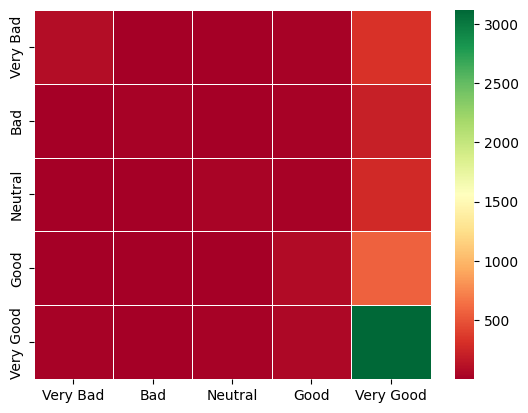

In [88]:
ax = sns.heatmap(confusion_matrix(y_test, y_pred), linewidth=0.5,cmap='RdYlGn')
ax.set_xticklabels(labels.keys())
ax.set_yticklabels(labels.keys())
plt.show()